# Stock Market Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import chart_studio.plotly as cs
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings("ignore")

### Attributes
#### Date: (datetime) ID. Consists of dates (only weekdays)
#### Open: (double) The price of the stock at the time trading began every day
#### High: (double) The highest price of the stock in a day during trading hours
#### Low: (double) The lowest price of the stock in a day during trading hours
#### Volume: (int) The volume of stocks traded on that day
#### Close: (double) The price of the stock at the time trading closes every day

##  Data Analysis :

In [2]:
df = pd.read_csv("TSLA.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       928 non-null    object 
 1   Open       928 non-null    float64
 2   High       928 non-null    float64
 3   Low        928 non-null    float64
 4   Close      928 non-null    float64
 5   Adj Close  928 non-null    float64
 6   Volume     928 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 50.9+ KB


In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-05,18.799999,18.933332,18.006666,18.436001,18.436001,281470500
1,2019-03-06,18.431999,18.767332,18.292667,18.416000,18.416000,155032500
2,2019-03-07,18.589333,18.980000,18.283333,18.439333,18.439333,141637500
3,2019-03-08,18.460667,19.039333,18.392668,18.942667,18.942667,132294000
4,2019-03-11,18.901333,19.418667,18.700001,19.394667,19.394667,110884500


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       928 non-null    datetime64[ns]
 1   Open       928 non-null    float64       
 2   High       928 non-null    float64       
 3   Low        928 non-null    float64       
 4   Close      928 non-null    float64       
 5   Adj Close  928 non-null    float64       
 6   Volume     928 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 50.9 KB


In [6]:
# f - formatted string literal 
print(f'Dataframe contains stock prices between {df.Date.min()}{df.Date.max()}')
print(f'Total days = {(df.Date.max() - df.Date.min()).days}days')

Dataframe contains stock prices between 2019-03-05 00:00:002022-11-04 00:00:00
Total days = 1340days


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,928.000000,928.000000,928.000000,928.000000,928.000000,9.280000e+02
mean,165.363279,169.213483,161.159661,165.269708,165.269708,1.342636e+08
std,117.543647,120.163980,114.532294,117.338134,117.338134,9.624344e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,34.004667,35.050500,33.181333,34.528999,34.528999,7.262692e+07
50%,201.061668,206.756668,198.451668,201.708336,201.708336,9.997470e+07
75%,259.524170,265.494163,254.614167,259.439171,259.439171,1.609208e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


## Data Preprocessing :

In [8]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Since there are no missing values no need to perform cleaning 

## Data Visualization :

### 1.Box Plot of Dataset 

<AxesSubplot:>

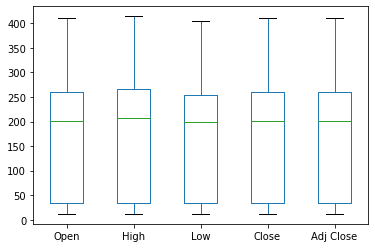

In [9]:
# box plot visualization 
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

### 2.Heat Map

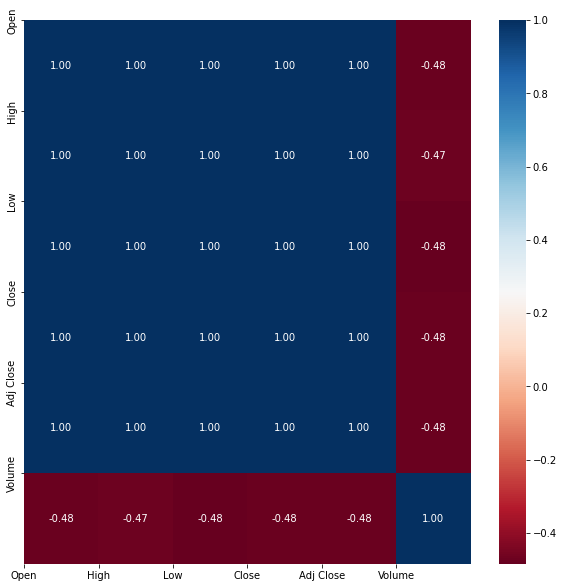

In [10]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

### 3.Scatter Plot

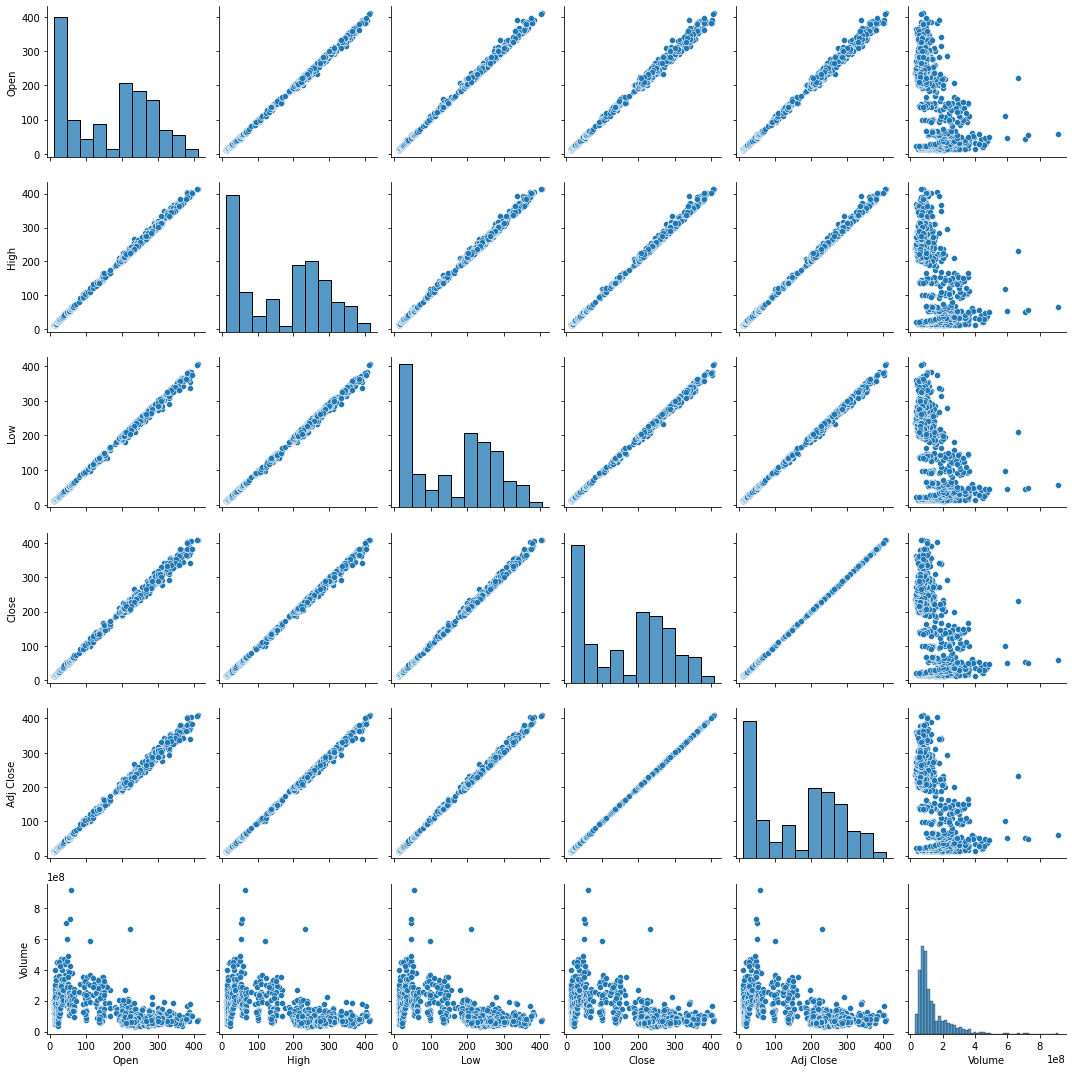

In [11]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

#### Therefore , from the above plots we can see that volume has scattered values and all others open ,close ,low and high have a linear relationship.

####  Hence we leave volume behind and use others for prediction

In [12]:
def get_corelated_col(col_corel, threshold): 
  # Col_corel to be column along which corelation to be measured 
  # Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(col_corel.index):
    if abs(col_corel[index]) > threshold:
      feature.append(index)
      value.append(col_corel[index])

  df = pd.DataFrame(data = value, index = feature, columns=['correlation value'])
  return df

In [13]:
# Measuring the corelation of close column with other columns
corelated_values = get_corelated_col(corr['Close'], 0.60)
corelated_values

,correlation value
Open,0.998278
High,0.999217
Low,0.999304
Close,1.000000
Adj Close,1.000000


In [14]:
df = df[corelated_values.index]
df.head()

,Open,High,Low,Close,Adj Close
0,18.799999,18.933332,18.006666,18.436001,18.436001
1,18.431999,18.767332,18.292667,18.416000,18.416000
2,18.589333,18.980000,18.283333,18.439333,18.439333
3,18.460667,19.039333,18.392668,18.942667,18.942667
4,18.901333,19.418667,18.700001,19.394667,19.394667


In [15]:
df.shape

(928, 5)

### Finally plotting Variation of stock price during specific time peroid

In [16]:
df = pd.read_csv("TSLA.csv")

layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='black'
        )
    )
)

tesla_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)
iplot(plot)

## Linear Regression Model

In [17]:
# building our model 
from sklearn.model_selection import train_test_split

# for normalizing dataset 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for evaluating the model 
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

In [18]:
#splitting the dataset into train and test sets 
X = np.array(df.index).reshape(-1,1)
# target or dependent variable 
Y = df['Close']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.6,random_state=101)

#### Scaling dataset as it reduces  computation time where all the values will be in range[0,1].

In [19]:
#Scaling the feature 
scaler = StandardScaler().fit(X_train)

In [20]:
#Creation of Linear Model 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [21]:
A = go.Scatter(
       x = X_train.T[0],y= Y_train,
       mode = "markers",name= "Actual")
B = go.Scatter(
       x = X_train.T[0],y= model.predict(X_train).T,
       mode = "lines",name= "Predicted")
tesla_data = [A,B]
layout.xaxis.title.text = 'Date'
plot2 = go.Figure(data = tesla_data,layout=layout)

In [22]:
iplot(plot2)

In [23]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, model.predict(X_train))}\t{r2_score(Y_test, model.predict(X_test))}
{'MSE'.ljust(10)}{MSE(Y_train, model .predict(X_train))}\t{MSE(Y_test, model.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8038304326838449	0.8186934122344409
MSE       2590.218416924674	2555.2637460163905



### Graph Representation of Feature Extraction :

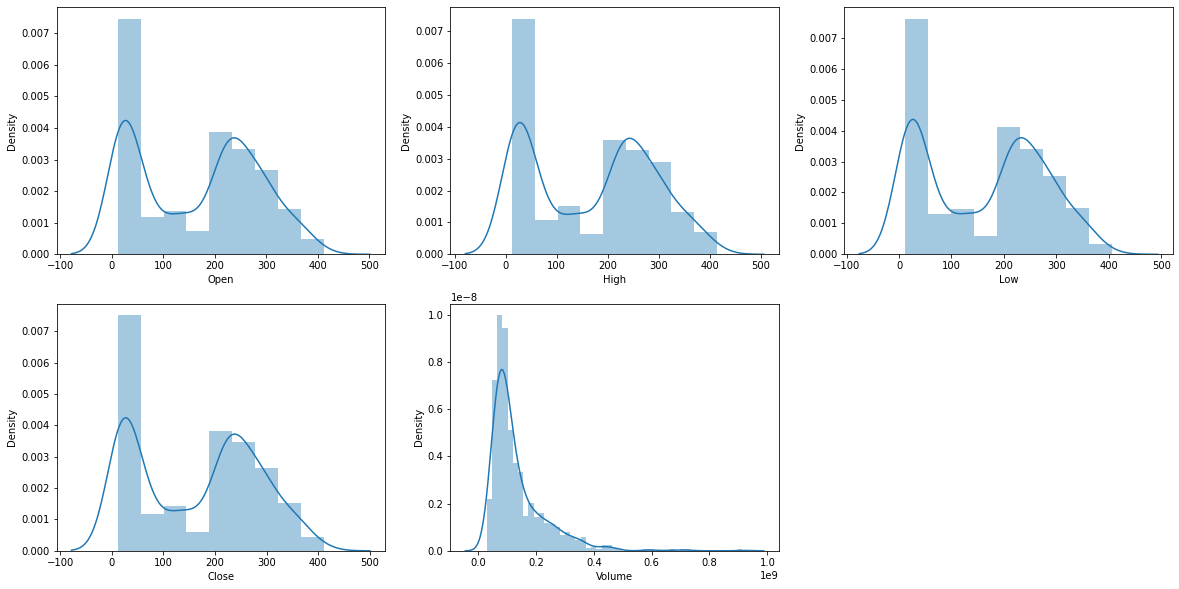

In [24]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

### Simple Moving Average (SMA) Model

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

df2 = pd.read_csv("NFLX.csv",index_col='Date')
df2 = df2.set_index(pd.DatetimeIndex(df2.index.values))
df2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-11-06 to 2022-11-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [26]:
# Create function for calculating Simple Moving Average (SMA)
def SMA(data, period=30, column='Adj Close'):
    return data[column].rolling(window=period).mean()

In [27]:
# Create two new columns to store the 10 day and 50 day SMA
df['SMA10'] = SMA(df, 10)
df['SMA50'] = SMA(df, 50)

In [28]:
# Get buy and sell signals
df['Signal'] = np.where(df['SMA10'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()
df['Buy'] = np.where(df['Position'] == 1, df['Adj Close'], np.NAN)
df['Sell'] = np.where(df['Position'] == -1, df['Adj Close'], np.NAN)

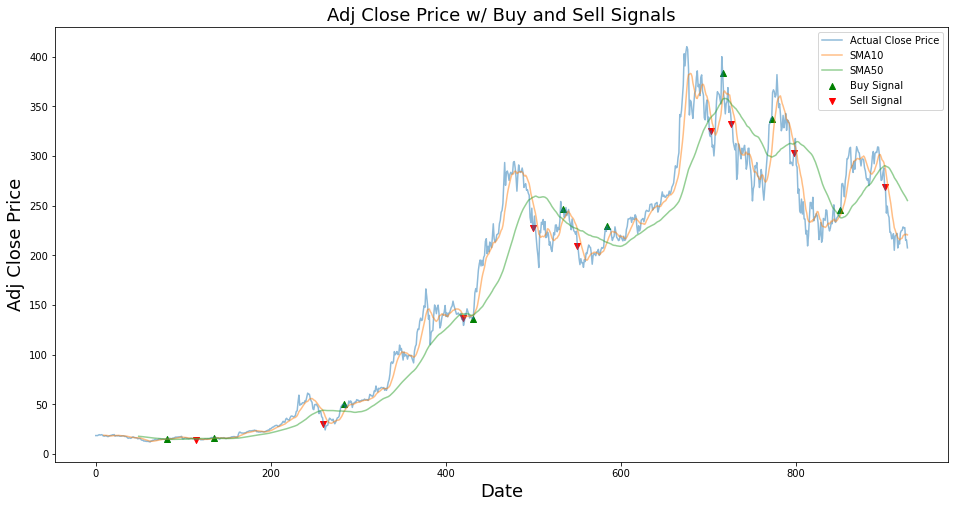

In [29]:
# Visualize the close price with SMA also Buy and Sell Signals
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'], alpha=0.5, label='Actual Close Price')
plt.plot(df['SMA10'], alpha=0.5, label='SMA10')
plt.plot(df['SMA50'], alpha=0.5, label='SMA50')

# Make buy or sell signal
plt.scatter(df.index, df['Buy'], alpha=1, label='Buy Signal', marker='^', color='green')
plt.scatter(df.index, df['Sell'], alpha=1, label='Sell Signal', marker='v', color='red')

# Adding text into the visualization
plt.title('Adj Close Price w/ Buy and Sell Signals', fontsize=18)
plt.ylabel('Adj Close Price', fontsize=18)
plt.xlabel('Date', fontsize=18)

# Give legend
plt.legend()

# Show the graph
plt.show()

## Exponential Moving Average (EMA) Model

Test RMSE: 90.271
Test MAPE: 0.243


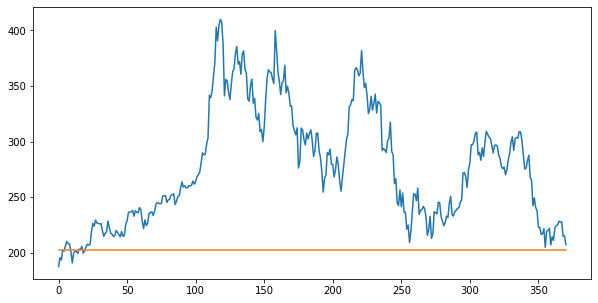

In [30]:
from statsmodels.tsa.api import SimpleExpSmoothing

X = df[['Close']].values
train_split = 0.6
split_idx= int(np.ceil(len(X)*train_split))
train = X[:split_idx]
test = X[split_idx:]
test_concat = np.array([]).reshape((0,1))

for i in range(len(test)):
    train_fit = np.concatenate((train, np.asarray (test_concat)))
    fit = SimpleExpSmoothing (np.asarray(train_fit)).fit(smoothing_level=0.2)
    test_pred = fit.forecast (1)
    test_concat = np.concatenate((np.asarray(test_concat), test_pred.reshape((-1,1))))

print('Test RMSE: %.3f' % mean_squared_error(test, test_concat, squared=False))
print('Test MAPE: %.3f' % mean_absolute_percentage_error(test, test_concat))

plt.figure(figsize=(10,5))
plt.plot(test)
plt.plot(test_concat)
plt.show()

## Long Short Term Memory Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [32]:
data = pd.read_csv("TCS_Dataset.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-18,3603.449951,3652.699951,3601.449951,3647.149902,3606.871338,3590107
1,2021-10-19,3669.000000,3690.100098,3625.199951,3634.149902,3594.014893,3135441
2,2021-10-20,3612.000000,3630.000000,3578.300049,3608.850098,3568.994385,2933693
3,2021-10-21,3604.100098,3607.449951,3511.250000,3532.500000,3493.487549,4871211
4,2021-10-22,3560.000000,3561.600098,3485.000000,3498.850098,3460.209473,2691670


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [34]:
data = data.dropna()
train_data = data.iloc[:,4:5].values

In [35]:
scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(train_data)
train_data.shape


(248, 1)

In [36]:
X_train = []
Y_train = []

for i in range (60,248):
    X_train.append(train_data[i-60:i,0])
    Y_train.append(train_data[i,0])

X_train,Y_train = np.array(X_train),np.array(Y_train)

In [37]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(188, 60, 1)

In [38]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [39]:
result = model.fit(X_train,Y_train,epochs = 15,batch_size = 32,verbose=2)

Epoch 1/15
6/6 - 6s - loss: 0.0975 - 6s/epoch - 1s/step
Epoch 2/15
6/6 - 1s - loss: 0.0339 - 869ms/epoch - 145ms/step
Epoch 3/15
6/6 - 1s - loss: 0.0249 - 920ms/epoch - 153ms/step
Epoch 4/15
6/6 - 1s - loss: 0.0226 - 1s/epoch - 179ms/step
Epoch 5/15
6/6 - 1s - loss: 0.0195 - 1s/epoch - 195ms/step
Epoch 6/15
6/6 - 1s - loss: 0.0176 - 1s/epoch - 191ms/step
Epoch 7/15
6/6 - 1s - loss: 0.0183 - 1s/epoch - 201ms/step
Epoch 8/15
6/6 - 1s - loss: 0.0194 - 931ms/epoch - 155ms/step
Epoch 9/15
6/6 - 1s - loss: 0.0187 - 841ms/epoch - 140ms/step
Epoch 10/15
6/6 - 1s - loss: 0.0172 - 891ms/epoch - 149ms/step
Epoch 11/15
6/6 - 1s - loss: 0.0165 - 1s/epoch - 170ms/step
Epoch 12/15
6/6 - 1s - loss: 0.0156 - 1s/epoch - 195ms/step
Epoch 13/15
6/6 - 1s - loss: 0.0172 - 996ms/epoch - 166ms/step
Epoch 14/15
6/6 - 1s - loss: 0.0155 - 1s/epoch - 171ms/step
Epoch 15/15
6/6 - 1s - loss: 0.0158 - 1s/epoch - 171ms/step


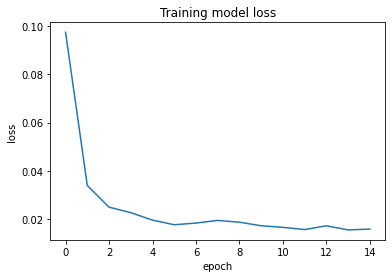

In [40]:
plt.plot(result.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [41]:
testData = pd.read_csv('TCS_Dataset.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = scaler.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(188, 60, 1)

In [42]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 50ms/step


array([[0.7036601 ],
       [0.72312057],
       [0.7418402 ],
       [0.759946  ],
       [0.7779817 ],
       [0.79613924],
       [0.81377125],
       [0.8294179 ],
       [0.84183997],
       [0.84983236],
       [0.8527671 ],
       [0.8497862 ],
       [0.84094864],
       [0.82730234],
       [0.8107586 ],
       [0.79366136],
       [0.7778    ],
       [0.7643171 ],
       [0.7535464 ],
       [0.7451461 ],
       [0.73868567],
       [0.7337981 ],
       [0.7296391 ],
       [0.72572726],
       [0.7223974 ],
       [0.7200873 ],
       [0.71892637],
       [0.7189345 ],
       [0.7194873 ],
       [0.7189808 ],
       [0.71588045],
       [0.7081488 ],
       [0.6953528 ],
       [0.6782436 ],
       [0.65808696],
       [0.63631016],
       [0.61414057],
       [0.5923485 ],
       [0.57222676],
       [0.55510503],
       [0.54184544],
       [0.5326636 ],
       [0.5276137 ],
       [0.5261349 ],
       [0.5278236 ],
       [0.53232145],
       [0.5388754 ],
       [0.547

In [43]:
# Predicted price 
p = scaler.inverse_transform(y_pred)
p

array([[3711.8157],
       [3731.9983],
       [3751.4124],
       [3770.19  ],
       [3788.8948],
       [3807.7258],
       [3826.012 ],
       [3842.2393],
       [3855.1223],
       [3863.411 ],
       [3866.4548],
       [3863.3633],
       [3854.1978],
       [3840.0454],
       [3822.8877],
       [3805.156 ],
       [3788.7063],
       [3774.7231],
       [3763.553 ],
       [3754.8408],
       [3748.1409],
       [3743.0718],
       [3738.7585],
       [3734.7017],
       [3731.2483],
       [3728.8525],
       [3727.6484],
       [3727.657 ],
       [3728.2302],
       [3727.7048],
       [3724.4895],
       [3716.471 ],
       [3703.2002],
       [3685.4563],
       [3664.552 ],
       [3641.967 ],
       [3618.975 ],
       [3596.3748],
       [3575.5063],
       [3557.7493],
       [3543.998 ],
       [3534.4753],
       [3529.238 ],
       [3527.7046],
       [3529.4558],
       [3534.1206],
       [3540.9175],
       [3549.4856],
       [3559.5845],
       [3571.183 ],


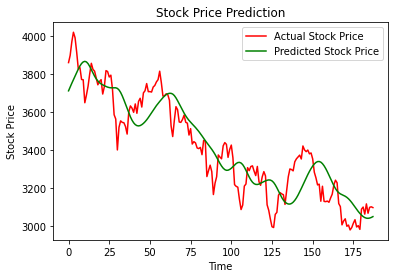

In [44]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(p, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Recurrent Nueral Network (RNN) Model

### Loading  pearson dataset 

In [45]:
df = pd.read_csv("Pearson_train.csv")
test_df = pd.read_csv("Pearson_test.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900


In [46]:
pearson_close = df['Close']
pearson_close.reset_index(drop=True,inplace=True)
pearson_close.shape

(1655,)

In [47]:
pearson_close =pd.DataFrame(pearson_close)

In [48]:
train=pearson_close.iloc[0:1620]
test=pearson_close.iloc[1620: ]

In [49]:
scaler= MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
test.shape

(35, 1)

In [50]:
scaler= MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [51]:
test.shape

(35, 1)

In [52]:
from tensorflow.keras.layers import SimpleRNN

In [53]:
from keras.preprocessing.sequence import TimeseriesGenerator
length = 35 # As we have 35 days of test data
batch_size = 32 # We are splitting ,it can be any value generally 32 works well. 
generator = TimeseriesGenerator(scaled_train,scaled_train,length = length ,batch_size = batch_size)
# Here we are creating an object with train - length and last 55 values will be predicted and validated

In [54]:
no_features = 1

model = Sequential()

model.add(SimpleRNN(30,input_shape=(length,no_features))) # 30 is number of layers
model.add(Dropout(rate=0.2)) # Helps you not to overfit the model
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse') # Backpropagating and error type

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout_4 (Dropout)         (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(generator,epochs=10,shuffle=False)

Epoch 1/10
50/50 [==============================] - 1s 5ms/step - loss: 0.0108
Epoch 2/10
50/50 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 3/10
50/50 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 4/10
50/50 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 5/10
50/50 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 6/10
50/50 [==============================] - 0s 5ms/step - loss: 0.0064
Epoch 7/10
50/50 [==============================] - 0s 5ms/step - loss: 0.0045
Epoch 8/10
50/50 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 9/10
50/50 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 10/10
50/50 [==============================] - 0s 5ms/step - loss: 0.0033


<AxesSubplot:>

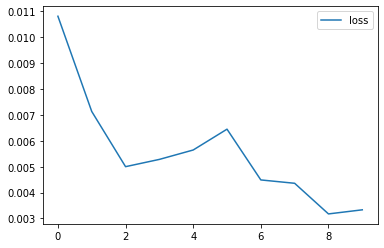

In [58]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### In above graph there is decrease in error rate 

##  Evaluating our created Model 

In [59]:
batch1 = scaled_train[-length:] # picks last 35 values in train set.
batch1

array([[0.94779926],
       [0.93459269],
       [0.89501073],
       [0.91121022],
       [0.88586482],
       [0.86113957],
       [0.89080987],
       [0.85385412],
       [0.85771525],
       [0.86476882],
       [0.89573874],
       [0.86003408],
       [0.83778406],
       [0.83632804],
       [0.83097855],
       [0.81954616],
       [0.81524822],
       [0.83295765],
       [0.82638941],
       [0.74455074],
       [0.67794627],
       [0.65284354],
       [0.64672289],
       [0.67549262],
       [0.65694734],
       [0.65258469],
       [0.67775753],
       [0.71160711],
       [0.71809446],
       [0.70204597],
       [0.7297102 ],
       [0.70333481],
       [0.71259397],
       [0.70608505],
       [0.70067084]])

In [60]:
batch1 = batch1.reshape((1,length,1))
batch1

array([[[0.94779926],
        [0.93459269],
        [0.89501073],
        [0.91121022],
        [0.88586482],
        [0.86113957],
        [0.89080987],
        [0.85385412],
        [0.85771525],
        [0.86476882],
        [0.89573874],
        [0.86003408],
        [0.83778406],
        [0.83632804],
        [0.83097855],
        [0.81954616],
        [0.81524822],
        [0.83295765],
        [0.82638941],
        [0.74455074],
        [0.67794627],
        [0.65284354],
        [0.64672289],
        [0.67549262],
        [0.65694734],
        [0.65258469],
        [0.67775753],
        [0.71160711],
        [0.71809446],
        [0.70204597],
        [0.7297102 ],
        [0.70333481],
        [0.71259397],
        [0.70608505],
        [0.70067084]]])

In [61]:
model.predict(batch1)

1/1 [==============================] - 0s 138ms/step


array([[0.77295697]], dtype=float32)

In [62]:
# first prediction value for batch 1
scaled_test[0] 

array([0.68292367])

In [63]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,no_features))
for i in range (len(test)):
    current_pred =model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch =np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 26ms/step


In [64]:
test_predictions

[array([0.77295697], dtype=float32),
 array([0.8379332], dtype=float32),
 array([0.85359305], dtype=float32),
 array([0.86919546], dtype=float32),
 array([0.8920209], dtype=float32),
 array([0.92950726], dtype=float32),
 array([0.95684206], dtype=float32),
 array([0.9672746], dtype=float32),
 array([0.96645385], dtype=float32),
 array([0.98013574], dtype=float32),
 array([0.9944655], dtype=float32),
 array([1.0035509], dtype=float32),
 array([1.0162795], dtype=float32),
 array([1.0197086], dtype=float32),
 array([1.035801], dtype=float32),
 array([1.041436], dtype=float32),
 array([1.039381], dtype=float32),
 array([1.0375854], dtype=float32),
 array([1.0503663], dtype=float32),
 array([1.045938], dtype=float32),
 array([1.0250766], dtype=float32),
 array([1.0029037], dtype=float32),
 array([0.98750657], dtype=float32),
 array([0.9893769], dtype=float32),
 array([0.9828925], dtype=float32),
 array([0.96618724], dtype=float32),
 array([0.95136666], dtype=float32),
 array([0.95120406], d

In [65]:
actual_price_predictions =scaler.inverse_transform(test_predictions)
actual_price_predictions

array([[2520.87594112],
       [2641.36653537],
       [2670.40588272],
       [2699.33867948],
       [2741.66568164],
       [2811.17966455],
       [2861.86878823],
       [2881.2146843 ],
       [2879.69269086],
       [2905.06411141],
       [2931.63687884],
       [2948.48469404],
       [2972.08830318],
       [2978.44729565],
       [3008.28875675],
       [3018.73800986],
       [3014.92738926],
       [3011.59757269],
       [3035.29822687],
       [3027.08653623],
       [2988.40159693],
       [2947.28456297],
       [2918.73243037],
       [2922.20074061],
       [2910.17621877],
       [2879.19829169],
       [2851.7153125 ],
       [2851.41378758],
       [2852.69460529],
       [2827.79658329],
       [2812.12579845],
       [2793.52730396],
       [2777.34189302],
       [2765.90925752],
       [2731.93078173]])

In [66]:
test['predictions'] = actual_price_predictions
test

,Close,predictions
1620,2353.92,2520.875941
1621,2329.17,2641.366535
1622,2267.25,2670.405883
1623,2270.55,2699.338679
1624,2297.91,2741.665682
1625,2276.98,2811.179665
1626,2265.27,2861.868788
1627,2338.82,2881.214684
1628,2324.87,2879.692691
1629,2358.71,2905.064111


#### These are the forecasted values for next 35 days.

<AxesSubplot:>

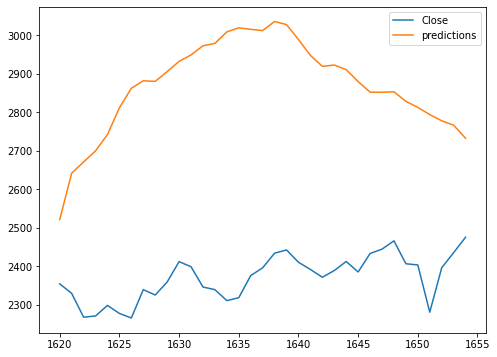

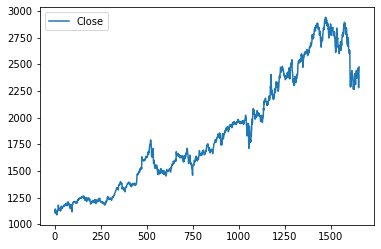

In [67]:
test.plot(figsize=(8,6))
pearson_close.plot()